In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, AveragePooling2D

In [17]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
print('X_train' + str(train_x.shape))
print('Y_train' + str(train_y.shape))
print('X_train' + str(test_x.shape))
print('Y_train' + str(test_y.shape))

X_train(60000, 28, 28)
Y_train(60000,)
X_train(10000, 28, 28)
Y_train(10000,)


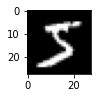

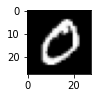

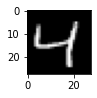

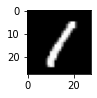

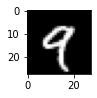

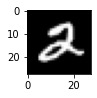

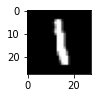

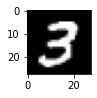

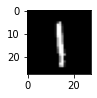

In [19]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [20]:
# normalize data
train_x = train_x.astype(np.float32)/255
test_x = test_x.astype(np.float32)/255

train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

#one hot encoding the data 
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [50]:
# create model 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Conv2D(64, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [52]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = 'adam' ,metrics=['accuracy'])

In [53]:
history = model.fit(train_x, train_y, epochs=5, batch_size = 128, validation_split = 0.3)

Epoch 1/5
329/329 [==============================] - 10s 30ms/step - loss: 0.4821 - accuracy: 0.8609 - val_loss: 0.1670 - val_accuracy: 0.9517
Epoch 2/5
329/329 [==============================] - 10s 29ms/step - loss: 0.1570 - accuracy: 0.9544 - val_loss: 0.1147 - val_accuracy: 0.9658
Epoch 3/5
329/329 [==============================] - 9s 29ms/step - loss: 0.1146 - accuracy: 0.9669 - val_loss: 0.0879 - val_accuracy: 0.9749
Epoch 4/5
329/329 [==============================] - 10s 30ms/step - loss: 0.0969 - accuracy: 0.9715 - val_loss: 0.0803 - val_accuracy: 0.9773
Epoch 5/5
329/329 [==============================] - 10s 29ms/step - loss: 0.0848 - accuracy: 0.9746 - val_loss: 0.0700 - val_accuracy: 0.9800


In [54]:
model.evaluate(test_x, test_y, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.0576 - accuracy: 0.9823


[0.05762862414121628, 0.9822999835014343]

In [55]:
model.save('mnist.h5')

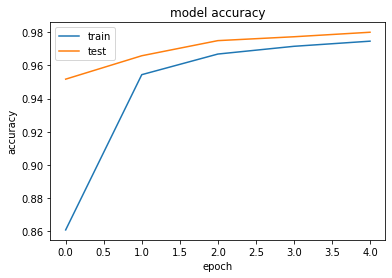

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

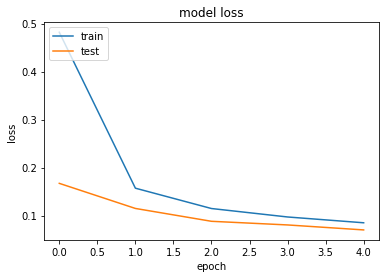

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()